<a href="https://colab.research.google.com/github/chikaj/7316/blob/main/Mapping_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/potsdam/

/content/drive/MyDrive/potsdam


In [4]:
ls

clip.tif               segmentation-2.tif          top_potsdam_6_11_label.tif
dsm_potsdam_06_11.tfw  segmentation.gpkg           top_potsdam_6_11_RGBIR.tfw
dsm_potsdam_06_11.tif  segmentation.tif            top_potsdam_6_11_RGBIR.tif
dsm_potsdam_06_12.tfw  Thumbs.db                   top_potsdam_6_12_label.tfw
dsm_potsdam_06_12.tif  top_potsdam_2_11_RGBIR.tfw  top_potsdam_6_12_label.tif
geobia.gpkg            top_potsdam_2_11_RGBIR.tif  top_potsdam_6_12_RGBIR.tfw
output.cpg             top_potsdam_3_12_RGBIR.tfw  top_potsdam_6_12_RGBIR.tif
output.dbf             top_potsdam_3_12_RGBIR.tif  top_potsdam_6_14_RGBIR.tfw
output.prj             top_potsdam_4_14_RGBIR.tfw  top_potsdam_6_14_RGBIR.tif
output.shp             top_potsdam_4_14_RGBIR.tif  top_potsdam_7_13_RGBIR.tfw
output.shx             top_potsdam_5_15_RGBIR.tfw  top_potsdam_7_13_RGBIR.tif
segmentation-0.tif     top_potsdam_5_15_RGBIR.tif
segmentation-1.tif     top_potsdam_6_11_label.tfw


In [5]:
import os
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import matplotlib
from matplotlib import pyplot
import folium
import numpy as np

In [7]:
src = rasterio.open("top_potsdam_6_11_RGBIR.tif")
i = src.read([1, 2, 3])

In [8]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 6000,
 'height': 6000,
 'count': 4,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 33N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32633"]]'),
 'transform': Affine(0.05, 0.0, 367276.5,
        0.0, -0.05, 5807362.6)}

In [9]:
src.transform

Affine(0.05, 0.0, 367276.5,
       0.0, -0.05, 5807362.6)

In [10]:
print(src.width)
print(src.height)

6000
6000


In [11]:
src.bounds

BoundingBox(left=367276.5, bottom=5807062.6, right=367576.5, top=5807362.6)

In [12]:
print(src.crs)
print(src.crs.wkt)

EPSG:32633
PROJCS["WGS 84 / UTM zone 33N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32633"]]


In [13]:
dst_crs = 'EPSG:4326' # 'EPSG:3857'
dst_transform, dst_width, dst_height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)

In [14]:
print(dst_transform)
print(dst_width)
print(dst_height)

| 0.00, 0.00, 13.05|
| 0.00,-0.00, 52.40|
| 0.00, 0.00, 1.00|
7341
4491


In [15]:
print("The x and y resolutions aren't really 0, they are " + str(dst_transform.a) + " and " + str(dst_transform.e) + ", respectively")

The x and y resolutions aren't really 0, they are 6.164384492403863e-07 and -6.164384492403863e-07, respectively


In [16]:
kwargs = src.meta.copy()
kwargs.update({
    'crs': dst_crs,
    'transform': dst_transform,
    'width': dst_width,
    'height': dst_height
})

In [17]:
type(i)

numpy.ndarray

In [19]:
i.shape

(3, 6000, 6000)

In [20]:
i.max()

np.uint8(253)

In [21]:
i[i != 0].min() # Or...np.min(i[np.nonzero(i)])

np.uint8(3)

In [22]:
dst_transform * (0, 0)

(13.049131667566941, 52.40046100950879)

In [23]:
dst_transform * (dst_width, dst_height)

(13.053656942222815, 52.39769258443325)

In [24]:
((dst_transform * (0, 0))[0] - (dst_transform * (dst_width, dst_height))[0]) / dst_transform[0]

-7341.000000000779

In [25]:
destination = np.zeros((3, dst_width, dst_height), np.uint8)

In [26]:
type(destination)

numpy.ndarray

In [27]:
destination.shape

(3, 7341, 4491)

In [28]:
# Working on this...from here below!
reproject(
    source = i,
    destination=destination,
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=dst_transform,
    dst_crs=dst_crs,
    resampling=Resampling.nearest
)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 Affine(6.164384492403863e-07, 0.0, 13.049131667566941,
        0.0, -6.164384492403863e-07, 52.40046100950879))

In [29]:
destination

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [30]:
destination.max()

np.uint8(253)

In [31]:
destination[destination != 0].min() # Or...np.min(destination[np.nonzero(destination)])

np.uint8(3)

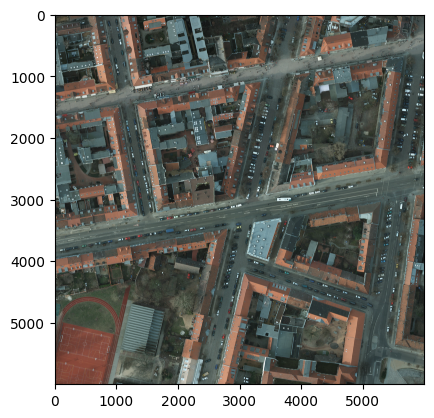

<Axes: >

In [32]:
deleteme = src.read()
show(deleteme)

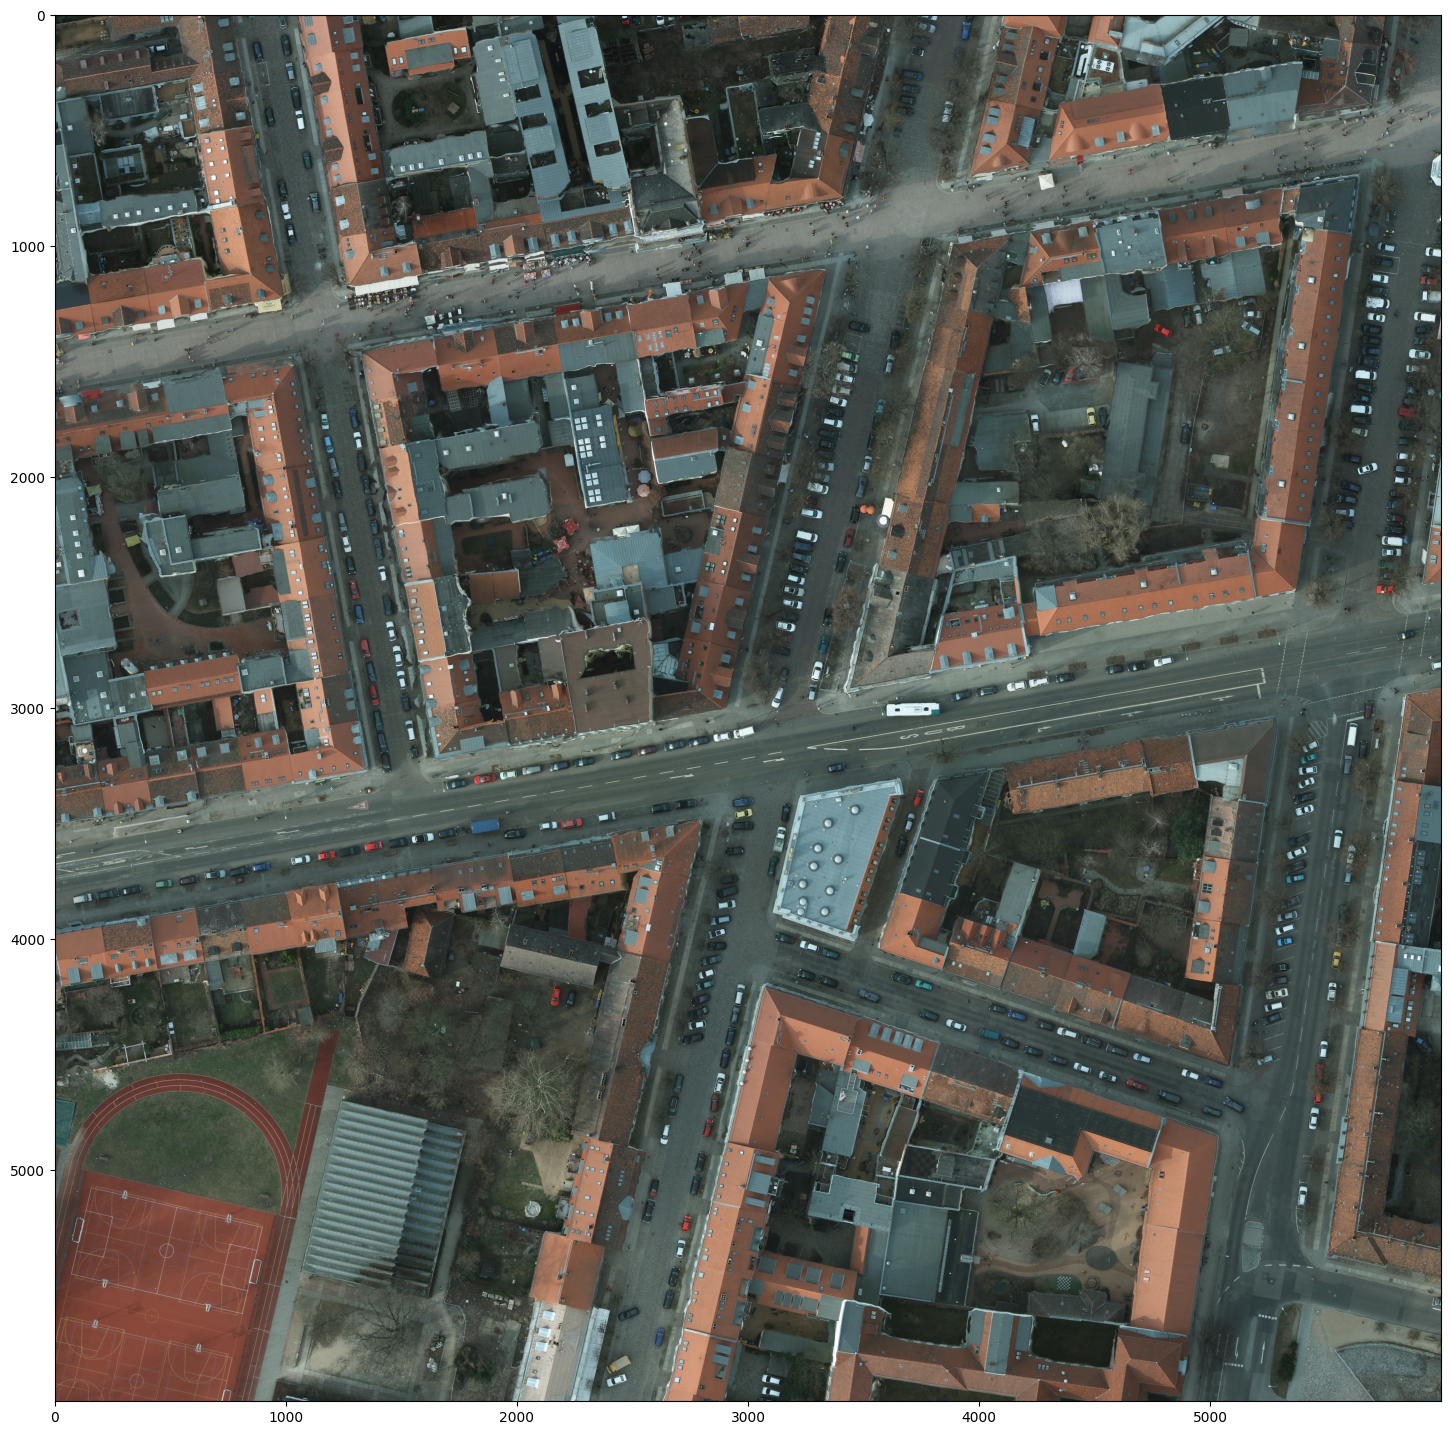

<Axes: >

In [33]:
fig = pyplot.subplots(1, 1, figsize=(18,18))
show(deleteme)

In [34]:
ul = dst_transform * (0, 0)
lr = dst_transform * (dst_width, dst_height)
dst_bounds = [[lr[0], ul[1]], ul[0], lr[1]]
dst_bounds

[[13.053656942222815, 52.40046100950879],
 13.049131667566941,
 52.39769258443325]

In [35]:
src.close()

## Now for some new stuff

In [36]:
from skimage.segmentation import slic
from rasterio import features
from geopandas import GeoDataFrame
from collections import OrderedDict

In [38]:
with rasterio.open("top_potsdam_6_11_RGBIR.tif") as src:
    # slic_params = {'compactness': 20,
    #               'n_segments': 200,
    #               'multichannel': True}
    slic_params = {'compactness': 20,
                  'n_segments': 200}
    img = src.read([1, 2, 3])
    image = img.transpose(1, 2, 0)
    rout = slic(image, **slic_params).astype('int32')

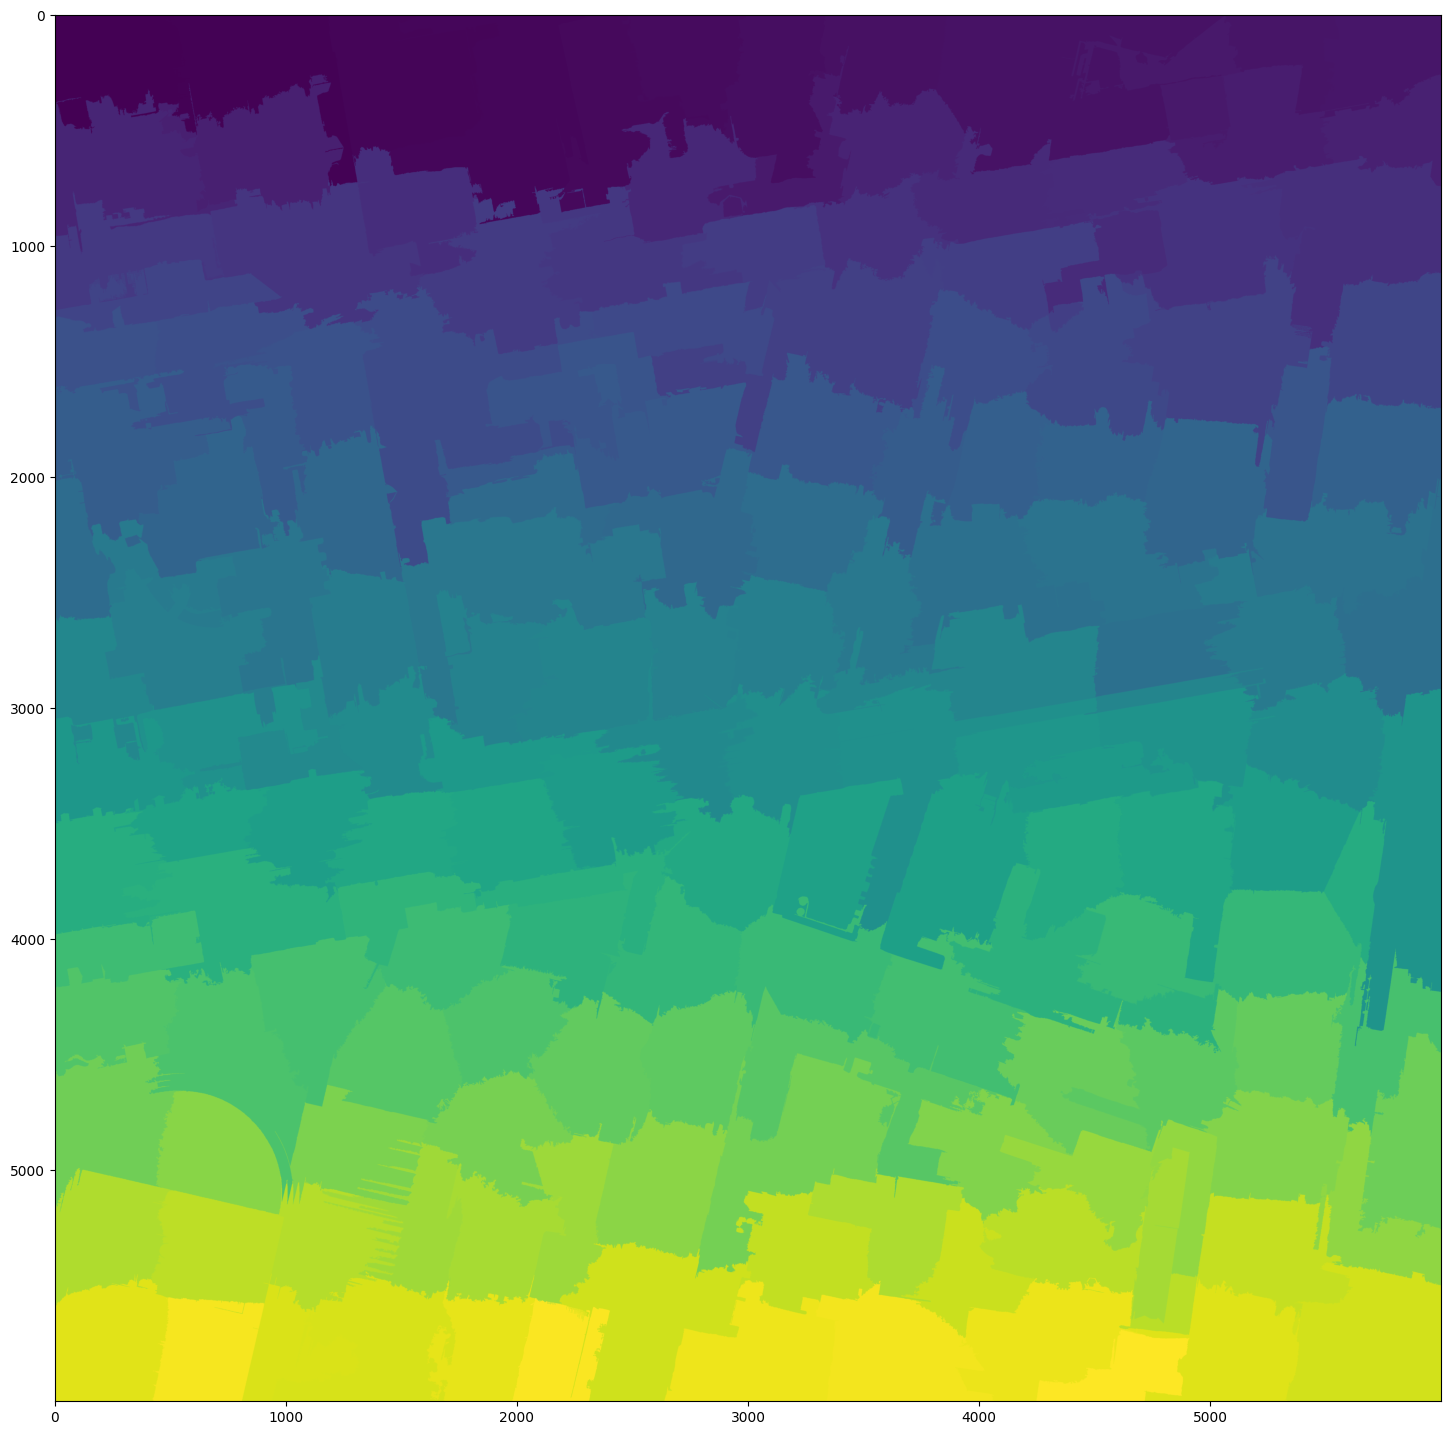

<Axes: >

In [39]:
fig = pyplot.subplots(1, 1, figsize=(18,18))
show(rout)

In [40]:
print(type(rout))
print(rout.shape)

<class 'numpy.ndarray'>
(6000, 6000)


In [41]:
output = rout[:, :, np.newaxis].transpose(2, 0, 1)
output

array([[[  1,   1,   1, ...,  11,  11,  11],
        [  1,   1,   1, ...,  11,  11,  11],
        [  1,   1,   1, ...,  11,  11,  11],
        ...,
        [156, 156, 156, ..., 152, 152, 152],
        [156, 156, 156, ..., 152, 152, 152],
        [156, 156, 156, ..., 152, 152, 152]]], dtype=int32)

In [43]:
ras = output[0]

shps = features.shapes(ras, transform=src.transform)
records = []

for id, shp in enumerate(shps):
    if shp[1] != 0:
        item = {'geometry': shp[0], 'id': id+1, 'properties':
                OrderedDict([('dn', int(shp[1]))]),
                'type': 'Feature'}
        records.append(item)

vec = GeoDataFrame.from_features(records)
vec.crs = src.crs

In [44]:
vec

geometry   dn
0    POLYGON ((367443.2 5807362.6, 367443.2 5807362...    8
1    POLYGON ((367530 5807362.6, 367530 5807362.35,...   10
2    POLYGON ((367553.3 5807362.6, 367553.3 5807362...   11
3    POLYGON ((367276.5 5807362.6, 367276.5 5807343...    1
4    POLYGON ((367400.45 5807362.6, 367400.45 58073...    6
..                                                 ...  ...
158  POLYGON ((367343.8 5807090.75, 367343.8 580709...  153
159  POLYGON ((367455.2 5807088.65, 367455.2 580708...  160
160  POLYGON ((367500.45 5807089.3, 367500.45 58070...  158
161  POLYGON ((367523.9 5807090.1, 367523.9 5807089...  155
162  POLYGON ((367551.8 5807092.65, 367551.8 580709...  152

[163 rows x 2 columns]

In [45]:
vec.to_file("output.shp")

In [46]:
%pwd

'/content/drive/MyDrive/potsdam'

In [47]:
%cd wk2

[Errno 2] No such file or directory: 'wk2'
/content/drive/MyDrive/potsdam


In [48]:
%pwd

'/content/drive/MyDrive/potsdam'

In [49]:
%system ls

['clip.tif\t       segmentation-2.tif\t   top_potsdam_6_11_label.tif',
 'dsm_potsdam_06_11.tfw  segmentation.gpkg\t   top_potsdam_6_11_RGBIR.tfw',
 'dsm_potsdam_06_11.tif  segmentation.tif\t\t   top_potsdam_6_11_RGBIR.tif',
 'dsm_potsdam_06_12.tfw  Thumbs.db\t\t   top_potsdam_6_12_label.tfw',
 'dsm_potsdam_06_12.tif  top_potsdam_2_11_RGBIR.tfw  top_potsdam_6_12_label.tif',
 'geobia.gpkg\t       top_potsdam_2_11_RGBIR.tif  top_potsdam_6_12_RGBIR.tfw',
 'output.cpg\t       top_potsdam_3_12_RGBIR.tfw  top_potsdam_6_12_RGBIR.tif',
 'output.dbf\t       top_potsdam_3_12_RGBIR.tif  top_potsdam_6_14_RGBIR.tfw',
 'output.prj\t       top_potsdam_4_14_RGBIR.tfw  top_potsdam_6_14_RGBIR.tif',
 'output.shp\t       top_potsdam_4_14_RGBIR.tif  top_potsdam_7_13_RGBIR.tfw',
 'output.shx\t       top_potsdam_5_15_RGBIR.tfw  top_potsdam_7_13_RGBIR.tif',
 'segmentation-0.tif     top_potsdam_5_15_RGBIR.tif',
 'segmentation-1.tif     top_potsdam_6_11_label.tfw']

In [50]:
%dirs

[]

In [51]:
%system cd ..
%system pwd

['/content/drive/MyDrive/potsdam']

In [52]:
%cd ..
%pwd

/content/drive/MyDrive


'/content/drive/MyDrive'

In [53]:
%dirs

[]

In [54]:
%dhist

Directory history (kept in _dh)
0: /content
1: /content/drive/MyDrive/potsdam
2: /content/drive/MyDrive


In [55]:
src.close()

In [56]:
print("How do I get this on a different pane?")

How do I get this on a different pane?


In [57]:
rasterio.Env

rasterio.env.Env